In [23]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

In [24]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_test['Transported'] = False
df = pd.concat([df_train, df_test], sort = False)
df.drop(['Name', 'PassengerId'], axis = 1, inplace = True)
df


,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,False
4273,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,False
4274,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,False
4275,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,False


In [25]:
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [26]:
df.shape[0] == df_train.shape[0] + df_test.shape[0]

True

In [27]:
df.isna().sum()

HomePlanet      288
CryoSleep       310
Cabin           299
Destination     274
Age             270
VIP             296
RoomService     263
FoodCourt       289
ShoppingMall    306
Spa             284
VRDeck          268
Transported       0
dtype: int64

In [28]:
df[['Deck', 'Num', 'Side']] = df['Cabin'].str.split('/', expand = True)
df = df.drop(columns = ['Cabin'])
df['Deck'] = df['Deck'].fillna('U')
df['Num'] = df['Num'].fillna(-1)
df['Side'] = df['Side'].fillna('U')

In [29]:
df['Destination'].value_counts()

Destination
TRAPPIST-1e      8871
55 Cancri e      2641
PSO J318.5-22    1184
Name: count, dtype: int64

In [30]:
df['Deck'] = df['Deck'].map({'G' : 0, 'F' : 1, 'E' : 2, 'D' : 3, 'C' : 4, 'B' : 5, 'A' : 6, 'U' : 7, 'T' : 8})
df['Side'] = df['Side'].map({'U' : -1, 'P' : 1, 'S' : 2})

In [31]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 12970 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    12682 non-null  object 
 1   CryoSleep     12660 non-null  object 
 2   Destination   12696 non-null  object 
 3   Age           12700 non-null  float64
 4   VIP           12674 non-null  object 
 5   RoomService   12707 non-null  float64
 6   FoodCourt     12681 non-null  float64
 7   ShoppingMall  12664 non-null  float64
 8   Spa           12686 non-null  float64
 9   VRDeck        12702 non-null  float64
 10  Transported   12970 non-null  bool   
 11  Deck          12970 non-null  int64  
 12  Num           12970 non-null  object 
 13  Side          12970 non-null  int64  
dtypes: bool(1), float64(6), int64(2), object(5)
memory usage: 1.4+ MB


In [32]:
impute_lis = ['Age', 'VIP', 'Num', 'CryoSleep', 'Side', 'Deck', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
rest = list(set(df.columns) - set(impute_lis))

df_rest = df[rest]
df_rest.head()


,Transported,HomePlanet,Destination
0,False,Europa,TRAPPIST-1e
1,True,Earth,TRAPPIST-1e
2,False,Europa,TRAPPIST-1e
3,False,Europa,TRAPPIST-1e
4,True,Earth,TRAPPIST-1e


In [45]:
imp = KNNImputer()
df_imputed = imp.fit_transform(df[impute_lis])
df_imputed = pd.DataFrame(df_imputed, columns = impute_lis)
df = pd.concat([df_rest.reset_index(drop = True), df_imputed.reset_index(drop = True)], axis = 1)
df.head()

,Transported,HomePlanet,Destination,Age,VIP,Num,CryoSleep,Side,Deck,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,False,Europa,TRAPPIST-1e,39.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0
1,True,Earth,TRAPPIST-1e,24.0,0.0,0.0,0.0,2.0,1.0,109.0,9.0,25.0,549.0,44.0
2,False,Europa,TRAPPIST-1e,58.0,1.0,0.0,0.0,2.0,6.0,43.0,3576.0,0.0,6715.0,49.0
3,False,Europa,TRAPPIST-1e,33.0,0.0,0.0,0.0,2.0,6.0,0.0,1283.0,371.0,3329.0,193.0
4,True,Earth,TRAPPIST-1e,16.0,0.0,1.0,0.0,2.0,1.0,303.0,70.0,151.0,565.0,2.0


In [34]:
df['HomePlanet'] = df['HomePlanet'].fillna('U')
df['Destination'] = df['Destination'].fillna('U')
category_colls = ['HomePlanet', 'Destination']

for col in category_colls:
    df = pd.concat([df, pd.get_dummies(df[col], prefix = col)], axis = 1)
df

,Transported,HomePlanet,Destination,Age,VIP,Num,CryoSleep,Side,Deck,RoomService,...,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_U,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_U
0,False,Europa,TRAPPIST-1e,39.0,0.0,0.0,0.0,1.0,5.0,0.0,...,0.0,0.0,False,True,False,False,False,False,True,False
1,True,Earth,TRAPPIST-1e,24.0,0.0,0.0,0.0,2.0,1.0,109.0,...,549.0,44.0,True,False,False,False,False,False,True,False
2,False,Europa,TRAPPIST-1e,58.0,1.0,0.0,0.0,2.0,6.0,43.0,...,6715.0,49.0,False,True,False,False,False,False,True,False
3,False,Europa,TRAPPIST-1e,33.0,0.0,0.0,0.0,2.0,6.0,0.0,...,3329.0,193.0,False,True,False,False,False,False,True,False
4,True,Earth,TRAPPIST-1e,16.0,0.0,1.0,0.0,2.0,1.0,303.0,...,565.0,2.0,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,False,Earth,TRAPPIST-1e,34.0,0.0,1496.0,1.0,2.0,0.0,0.0,...,0.0,0.0,True,False,False,False,False,False,True,False
12966,False,Earth,TRAPPIST-1e,42.0,0.0,-1.0,0.0,-1.0,7.0,0.0,...,10.0,144.0,True,False,False,False,False,False,True,False
12967,False,Mars,55 Cancri e,24.6,0.0,296.0,1.0,1.0,3.0,0.0,...,0.0,0.0,False,False,True,False,True,False,False,False
12968,False,Europa,U,30.2,0.0,297.0,0.0,1.0,3.0,0.0,...,0.0,523.0,False,True,False,False,False,False,False,True


In [35]:
df = df.drop(columns = category_colls)

In [36]:
df.head()

,Transported,Age,VIP,Num,CryoSleep,Side,Deck,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_U,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_U
0,False,39.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,False,True,False,False,False,False,True,False
1,True,24.0,0.0,0.0,0.0,2.0,1.0,109.0,9.0,25.0,549.0,44.0,True,False,False,False,False,False,True,False
2,False,58.0,1.0,0.0,0.0,2.0,6.0,43.0,3576.0,0.0,6715.0,49.0,False,True,False,False,False,False,True,False
3,False,33.0,0.0,0.0,0.0,2.0,6.0,0.0,1283.0,371.0,3329.0,193.0,False,True,False,False,False,False,True,False
4,True,16.0,0.0,1.0,0.0,2.0,1.0,303.0,70.0,151.0,565.0,2.0,True,False,False,False,False,False,True,False


In [44]:
#feature engineering
bill_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
df['amt_spent'] = df[bill_cols].sum(axis = 1)
df['std_amt_spent'] = df[bill_cols].std(axis = 1)
df['mean_amt_spent'] = df[bill_cols].mean(axis = 1)

df['3_high_cols'] = df['CryoSleep'] + df['HomePlanet_Europa'] + df['Destination_55 Cancri e']
df['3_low_cols'] = df['mean_amt_spent'] + df['amt_spent'] + df['HomePlanet_Earth']
df

,Transported,Age,VIP,Num,CryoSleep,Side,Deck,RoomService,FoodCourt,ShoppingMall,...,HomePlanet_U,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_U,amt_spent,std_amt_spent,mean_amt_spent,3_high_cols,3_low_cols
0,False,39.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,...,False,False,False,True,False,0.0,0.000000,0.0,1.0,0.0
1,True,24.0,0.0,0.0,0.0,2.0,1.0,109.0,9.0,25.0,...,False,False,False,True,False,736.0,227.807375,147.2,0.0,884.2
2,False,58.0,1.0,0.0,0.0,2.0,6.0,43.0,3576.0,0.0,...,False,False,False,True,False,10383.0,3013.383198,2076.6,1.0,12459.6
3,False,33.0,0.0,0.0,0.0,2.0,6.0,0.0,1283.0,371.0,...,False,False,False,True,False,5176.0,1373.410427,1035.2,1.0,6211.2
4,True,16.0,0.0,1.0,0.0,2.0,1.0,303.0,70.0,151.0,...,False,False,False,True,False,1091.0,223.988169,218.2,0.0,1310.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,False,34.0,0.0,1496.0,1.0,2.0,0.0,0.0,0.0,0.0,...,False,False,False,True,False,0.0,0.000000,0.0,1.0,1.0
12966,False,42.0,0.0,-1.0,0.0,-1.0,7.0,0.0,847.0,17.0,...,False,False,False,True,False,1018.0,364.441079,203.6,0.0,1222.6
12967,False,24.6,0.0,296.0,1.0,1.0,3.0,0.0,0.0,0.0,...,False,True,False,False,False,0.0,0.000000,0.0,2.0,0.0
12968,False,30.2,0.0,297.0,0.0,1.0,3.0,0.0,2680.0,0.0,...,False,False,False,False,True,3203.0,1162.334633,640.6,1.0,3843.6


In [38]:
df.corr()['Transported'].sort_values(ascending = False)

Transported                  1.000000
CryoSleep                    0.324373
3_high_cols                  0.284177
HomePlanet_Europa            0.131977
Destination_55 Cancri e      0.083625
Deck                         0.077959
Side                         0.059872
FoodCourt                    0.034746
HomePlanet_U                 0.006403
HomePlanet_Mars              0.005643
ShoppingMall                 0.004154
Destination_PSO J318.5-22    0.000760
Destination_U               -0.000554
VIP                         -0.018720
Num                         -0.035240
Age                         -0.050520
Destination_TRAPPIST-1e     -0.072731
HomePlanet_Earth            -0.119644
std_amt_spent               -0.121173
mean_amt_spent              -0.140452
amt_spent                   -0.140452
3_low_cols                  -0.140476
VRDeck                      -0.142783
Spa                         -0.154832
RoomService                 -0.174781
Name: Transported, dtype: float64

In [39]:
df_train, df_test = df[:df_train.shape[0]], df[df_train.shape[0]:]
df_test = df_test.drop(columns = 'Transported') # X
df_train.shape, df_test.shape

((8693, 25), (4277, 24))

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


X = df_train.drop(columns = 'Transported')
y = df_train['Transported']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

model_1 = LogisticRegression()


In [41]:
model_1.fit(X_train, y_train)
pred = model_1.predict(X_test)
acc = model_1.score(X_test, y_test)
acc

C:\Users\Nikki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7705577918343876

In [42]:
df_dummy = pd.read_csv('test.csv')
pred = model_1.predict(df_test)

final = pd.DataFrame()
final['PassengerId'] = df_dummy['PassengerId']
final['Transported'] = pred
final.shape

(4277, 2)

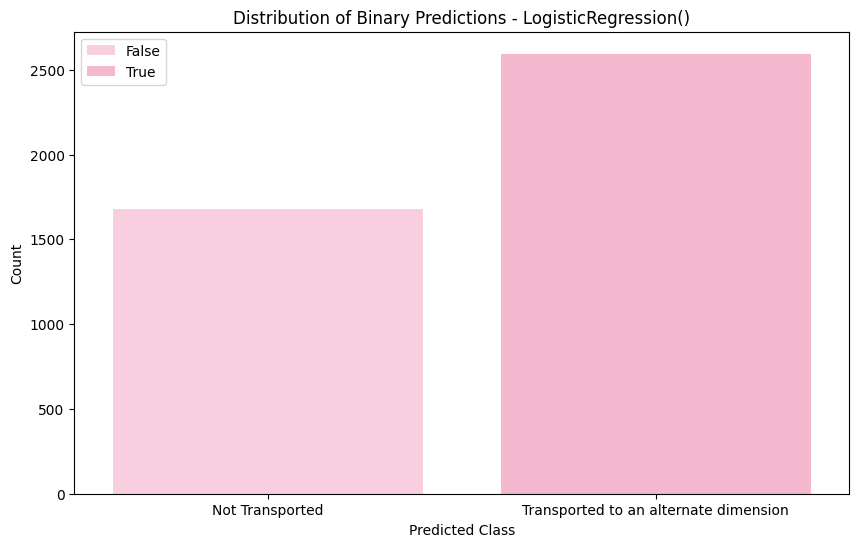

In [43]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

colors = ['#BDE0FE',  '#A2D2FF', '#FFAFCC','#FFC8DD', '#9015D7']
cmap = LinearSegmentedColormap.from_list("red", colors, N=256)
sns.set_palette(sns.color_palette(colors))


plt.figure(figsize=(10, 6))
sns.countplot(x=pred, palette=[colors[3], colors[2]], hue=pred)
plt.title(f'Distribution of Binary Predictions - {model_1}')
plt.xlabel('Predicted Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Transported', 'Transported to an alternate dimension'])
plt.show()